#### Installation of R packages

In [77]:
#install.packages("ISwR")

#### Package loading

In [78]:
library(ISwR)

#### Variable definition and assignment

In [79]:
weight <- 60
height = 1.75
subject <- "A"
healthy <- TRUE

#### Variable evaluation

In [80]:
weight

[1] 60

#### Functions for type checking

In [81]:
is.numeric(weight) # variable 
is.double(weight)
is.integer(weight)
is.character(subject)

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

#### Functions for variable conversion

In [82]:
weight <- as.integer(weight)
is.integer(weight)

[1] TRUE

#### Computing the body mass index (BMI) from the weight and height

In [83]:
#Body mass index (BMI)
bmi <- weight/height^2 
bmi 

[1] 19.59184

#### Functions for string manipulation

In [84]:
message <- sprintf("%.1f", bmi)
print(message)

[1] "19.6"


#### Vector definition

In [85]:
weight <- c(60, 72, 57, 90, 95, 72) 
height <- c(1.75, 1.80, 1.65, 1.90, 1.74, 1.91)
subject <- c("A", "B", "C", "D", "E", "F")


#### Vector evaluation

In [86]:
weight
height
subject

[1] 60 72 57 90 95 72

[1] 1.75 1.80 1.65 1.90 1.74 1.91

[1] "A" "B" "C" "D" "E" "F"

#### Creating a vector with a particular size

In [87]:
vec <- rep(0, 10)
vec

[1] 0 0 0 0 0 0 0 0 0 0

#### Vector length

In [88]:
length(weight)


[1] 6

#### Vector indexes: from one to the length of the vector

In [89]:
weight[1]
weight[length(weight)]

[1] 60

[1] 72

#### Iteration: for loop
from one to the length of weight

In [90]:
bmi <- 0
for (i in 1:length(weight)) {
  bmi[i] <- weight[i]/height[i]^2
}


evaluation of the bmi vector

In [91]:
bmi

[1] 19.59184 22.22222 20.93664 24.93075 31.37799 19.73630

#### Iteration: while loop
run while i is below or equal to the length of weight

In [92]:
bmi <- 0
i <- 1
while (i <= length(weight)) {
  bmi[i] <- weight[i]/height[i]^2
  i <- i + 1
}


In [93]:
bmi

[1] 19.59184 22.22222 20.93664 24.93075 31.37799 19.73630

#### Remove a variable

In [94]:
rm(bmi)
exists("bmi")

[1] FALSE

#### Right way of manipulating vectors: assigning at once

In [95]:
bmi <- weight/height^2 
bmi 

[1] 19.59184 22.22222 20.93664 24.93075 31.37799 19.73630

#### Creating a function
name <- function(parameters) { body }

In [96]:
compute_bmi <- function(weight, height) {
  bmi <- weight/height^2 
  return(bmi)
}

#### Using a function with scalars

In [97]:

bmi <- compute_bmi(60, 1.75)
bmi


[1] 19.59184

#### Using the same function with vectors

In [98]:
bmi <- compute_bmi(weight, height)
bmi

[1] 19.59184 22.22222 20.93664 24.93075 31.37799 19.73630

#### Example of a function to compute the average
(iterating in all elements of the vector)

In [99]:
average <- function(vec) {
    s <- 0
    n <- length(vec)
    for (x in vec) {
      s <- s + x  
    }
    return(s/n)
}

invoking the function

In [100]:
avg_bmi <- average(bmi)
avg_bmi

[1] 23.13262

#### Example of a function to compute the average
(manipulating vectors at once)

In [101]:
average <- function(vec) {
    s <- sum(vec)
    n <- length(vec)
    return(s/n)
}

invoking the function

In [102]:
avg_bmi <- average(bmi)
avg_bmi

[1] 23.13262

#### Average function using mean function
Major statistical functions are available in R

In [103]:
average <- function(vec) {
    return(mean(vec))
}

invoking the function

In [104]:
avg_bmi <- average(bmi)
avg_bmi

[1] 23.13262

#### Working with vectors with NA
Operations with NA lead to NA.

In [105]:
x <- c(10, NA, 13)
y <- average(x)
y

[1] NA

#### addressing NA with na.rm=TRUE

In [106]:
average <- function(vec) {
    return(mean(vec, na.rm=TRUE))
}

In [107]:
x <- c(10, NA, 13)
y <- average(x)
y

[1] 11.5

#### Plotting graphics
scatter plots

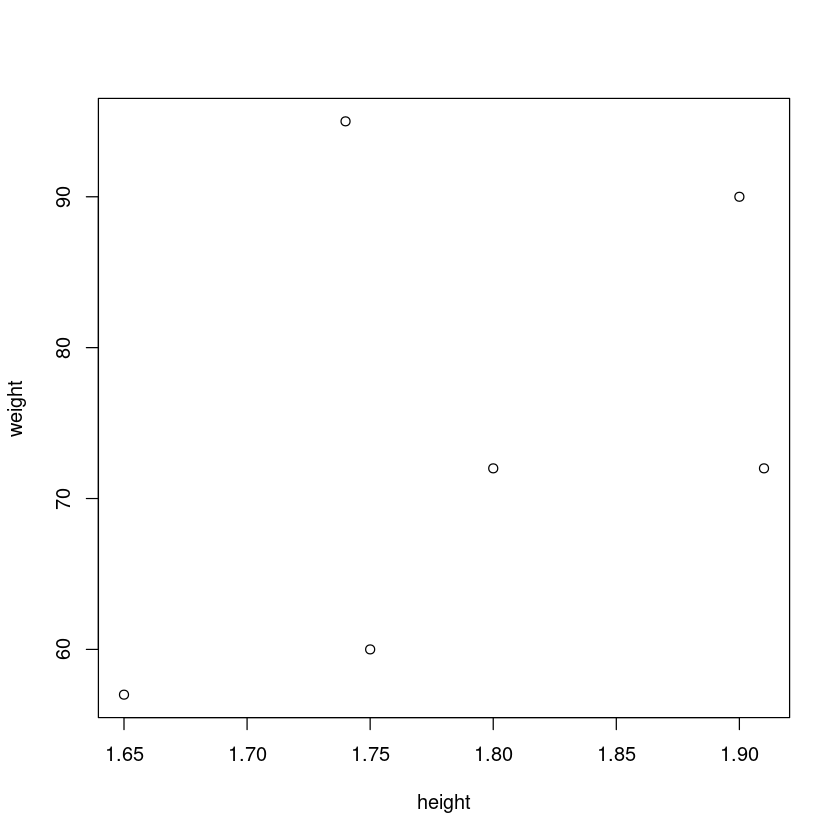

In [108]:
plot(height, weight)

#### Most functions contain many default parameters

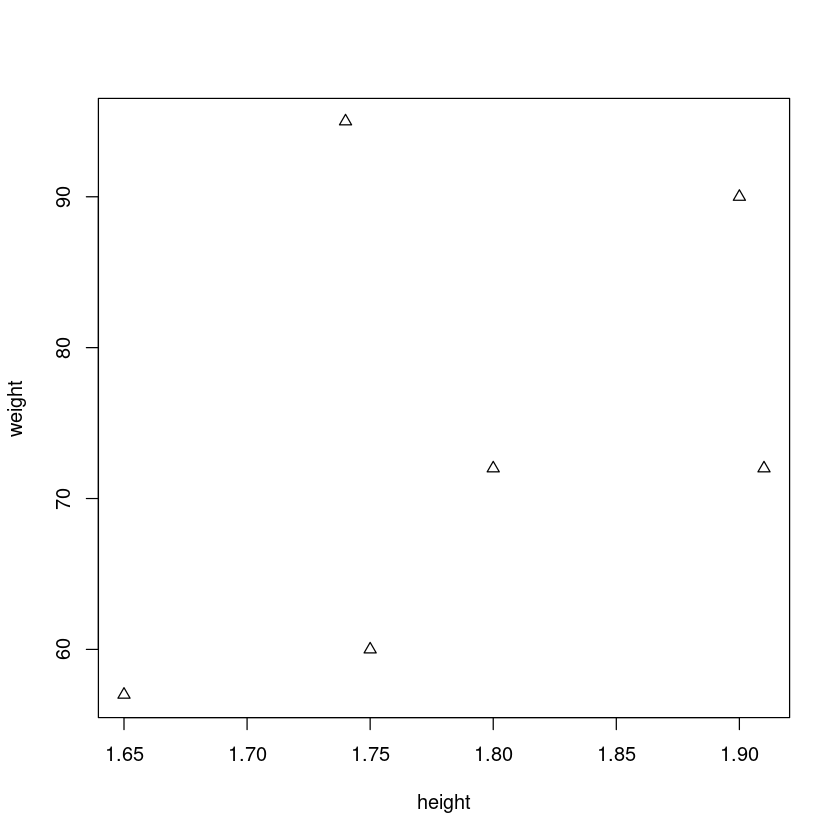

In [109]:
plot(height, weight, pch=2)

#### Default function arguments can be shown with args

In [110]:
args(plot.default)

function (x, y = NULL, type = "p", xlim = NULL, ylim = NULL, 
    log = "", main = NULL, sub = NULL, xlab = NULL, ylab = NULL, 
    ann = par("ann"), axes = TRUE, frame.plot = axes, panel.first = NULL, 
    panel.last = NULL, asp = NA, xgap.axis = NA, ygap.axis = NA, 
    ...) 
NULL

#### All functions in R that belongs to packages have help with examples

In [111]:
?base::plot

#### Canvas for plotting is still active until a new plot

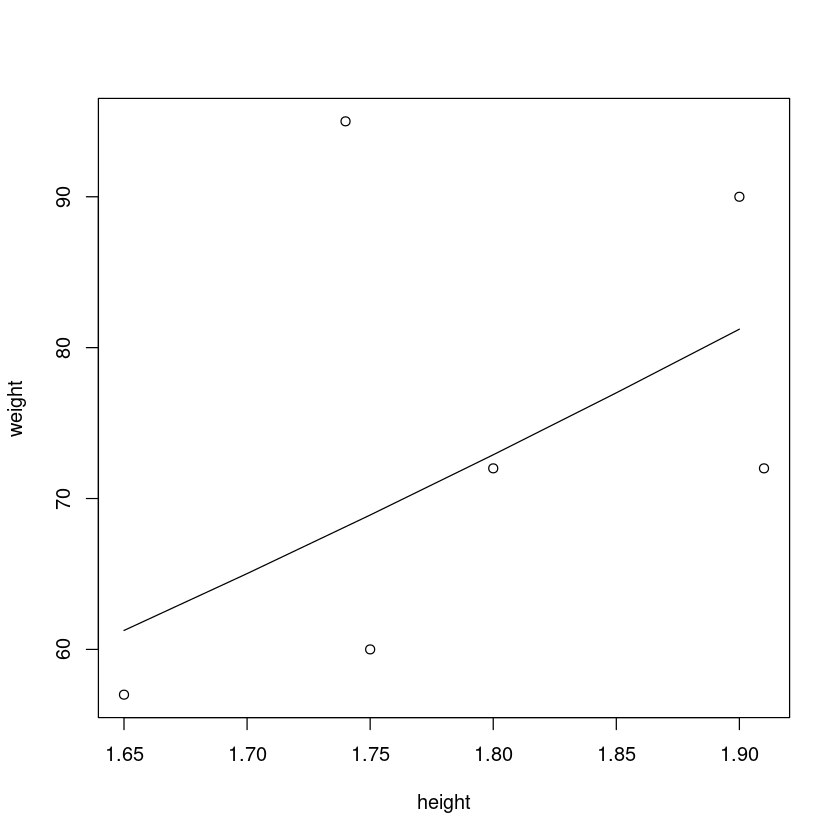

In [112]:
plot(height, weight)
hh = c(1.65, 1.70, 1.75, 1.80, 1.85, 1.90)
lines(hh, 22.5 * hh^2)

#### Factors
Factors are used to handle categorical data.

In [113]:
pain <- c(0,3,2,2,1)
fpain <- factor(pain,levels=0:3, ordered=TRUE)
fpain

[1] 0 3 2 2 1
Levels: 0 < 1 < 2 < 3

#### Levels provide correspondence between numerical values and categorical labels

In [114]:
levels(fpain) <- c("none","mild","medium","severe")
fpain

[1] none   severe medium medium mild  
Levels: none < mild < medium < severe

#### Convert height to factor
Levels: small, medium, high

#### coding setting element by element

In [115]:
lev <- rep("", length(height))

for (i in 1:length(height)) {
  if (height[i] < 1.7)
    lev[i] <- "short"
  else if (height[i] < 1.9)
    lev[i] <- "medium"
  else 
    lev[i] <- "tall"
}
lev <- as.factor(lev)
lev

[1] medium medium short  tall   medium tall  
Levels: medium short tall

#### coding setting the vector at once
It uses the cut function.

In [116]:
lev <- cut(height, breaks=c(0, 1.7, 1.9, .Machine$double.xmax), ordered=TRUE)
lev
levels(lev) <- c("short", "medium", "tall")
lev

[1] (1.7,1.9]      (1.7,1.9]      (0,1.7]        (1.7,1.9]      (1.7,1.9]     
[6] (1.9,1.8e+308]
Levels: (0,1.7] < (1.7,1.9] < (1.9,1.8e+308]

[1] medium medium short  medium medium tall  
Levels: short < medium < tall

#### Matrix
Matrices can be filled from vectors or data frames. 

In [117]:
x <- 1:9
x

[1] 1 2 3 4 5 6 7 8 9

#### Converting a vector to matrix

In [118]:
dim(x) <- c(3,3)
x

1,4,7
2,5,8
3,6,9


#### accessing elements from a matrix

In [119]:
for (i in 1:nrow(x)) 
    for (j in 1:ncol(x))
        print(x[i,j])
    


[1] 1
[1] 4
[1] 7
[1] 2
[1] 5
[1] 8
[1] 3
[1] 6
[1] 9


#### Iterating and assigning values to each element

In [120]:
y <- x
for (i in 1:nrow(y)) 
    for (j in 1:ncol(y))
        y[i,j] <- 3 * y[i, j]
    
y

3,12,21
6,15,24
9,18,27


#### Assigning the values of a matrix at once

In [121]:
y <- 3*x
y

3,12,21
6,15,24
9,18,27


#### Converting a vector to a matrix by row

In [122]:
x <- matrix(1:9,nrow=3,byrow=T)
x

1,2,3
4,5,6
7,8,9


#### transposing a matrix

In [123]:
x <- t(x)
x

1,4,7
2,5,8
3,6,9


#### computing the determinant of a matrix

In [124]:
det(x)

[1] 0

#### Lists
Lists are used to work with "objects"

In [125]:
a <- c(5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770)
b <- c(3910,4220,3885,5160,5645,4680,5265,5975,6790,6900,7335)

mybag <- list(a, b, 0, "a")
mybag

[[1]]
 [1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

[[2]]
 [1] 3910 4220 3885 5160 5645 4680 5265 5975 6790 6900 7335

[[3]]
[1] 0

[[4]]
[1] "a"

adding an element into a list

In [126]:
n <- length(mybag)
mybag[[n+1]] <- "b"
mybag

[[1]]
 [1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

[[2]]
 [1] 3910 4220 3885 5160 5645 4680 5265 5975 6790 6900 7335

[[3]]
[1] 0

[[4]]
[1] "a"

[[5]]
[1] "b"

#### List slicing

In [127]:
slice <- mybag[1]
slice
is.list(slice)

[[1]]
 [1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

[1] TRUE

#### Slicing is also a list

In [128]:
slice <- mybag[c(1,3)]
slice
is.list(slice)

[[1]]
 [1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

[[2]]
[1] 0

[1] TRUE

#### A list is also a vector

In [129]:
#list is also a vector
is.vector(slice)

[1] TRUE

#### Member reference
It accesses the element

In [130]:
h <- mybag[[1]]
h

[1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

An element can be evaluated. 
In this case, it is a vector.

In [131]:
is.vector(h)
is.list(h)

[1] TRUE

[1] FALSE

#### Naming variables
They are properties on the list

In [132]:
mybag <- list(x=a, y=b, const=0, lit="a")
mybag

$x
 [1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

$y
 [1] 3910 4220 3885 5160 5645 4680 5265 5975 6790 6900 7335

$const
[1] 0

$lit
[1] "a"

#### Adding, accessing, and removing elements

In [133]:
mybag$c <- mybag$x - mybag$y
mybag$const <- NULL
mybag$lit <- NULL
mybag

$x
 [1] 5260 5470 5640 6180 6390 6515 6805 7515 7515 8230 8770

$y
 [1] 3910 4220 3885 5160 5645 4680 5265 5975 6790 6900 7335

$c
 [1] 1350 1250 1755 1020  745 1835 1540 1540  725 1330 1435

#### Data frames
Data frames (tables) provide support for structured data. 

In [134]:
d <- data.frame(A=a, B=b)
head(d)

,A,B
,<dbl>,<dbl>
1,5260,3910
2,5470,4220
3,5640,3885
4,6180,5160
5,6390,5645
6,6515,4680


#### Adding a column in the data frame 

In [135]:
d$c <- d$A + d$B
head(d)

,A,B,c
,<dbl>,<dbl>,<dbl>
1,5260,3910,9170
2,5470,4220,9690
3,5640,3885,9525
4,6180,5160,11340
5,6390,5645,12035
6,6515,4680,11195


In [136]:
d$A <- NULL
head(d)

,B,c
,<dbl>,<dbl>
1,3910,9170
2,4220,9690
3,3885,9525
4,5160,11340
5,5645,12035
6,4680,11195


####  Reading csv file
There are many functions for reading CSV, Excel, and RData formats.

In [137]:
wine = read.table(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", 
                  header = TRUE, sep = ",")
  colnames(wine) <- c('Type', 'Alcohol', 'Malic', 'Ash', 
                      'Alcalinity', 'Magnesium', 'Phenols', 
                      'Flavanoids', 'Nonflavanoids',
                      'Proanthocyanins', 'Color', 'Hue', 
                      'Dilution', 'Proline')
head(wine)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


####  saving in binary format 

In [138]:
save(wine, file="wine.RData")

####  removing data frame from memory

In [139]:
rm(wine)

####  load binary format

In [140]:
load("wine.RData")
head(wine, 3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


####  exporting data.frame into csv file

In [141]:
write.table(wine, file="wine.csv", row.names=FALSE, quote = FALSE, sep = ",")

####  filtering vectors

In [142]:
a <- c(5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770)
b <- c(3910,4220,3885,5160,5645,4680,5265,5975,6790,6900,7335)

# logical vector
bool <- (a > 7000)
bool

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE

In [143]:
# selecting elements from positions that are true
a[bool] 

[1] 7515 7515 8230 8770

In [144]:
# filtering with logical expressions
b[a < 6000 | a > 7000]

[1] 3910 4220 3885 5975 6790 6900 7335

In [145]:
b[6000 <= a & a <= 7000]

[1] 5160 5645 4680 5265

####  filtering data frames

In [146]:
data <- data.frame(a=a, b=b)
data$c <- data$a - data$b
head(data, nrow(data))

,a,b,c
,<dbl>,<dbl>,<dbl>
1,5260,3910,1350
2,5470,4220,1250
3,5640,3885,1755
4,6180,5160,1020
5,6390,5645,745
6,6515,4680,1835
7,6805,5265,1540
8,7515,5975,1540
9,7515,6790,725


In [147]:
head(data[data$a > 7000,])

,a,b,c
,<dbl>,<dbl>,<dbl>
8,7515,5975,1540
9,7515,6790,725
10,8230,6900,1330
11,8770,7335,1435


In [148]:
head(data[data$a > 7000,c(1,2)])

,a,b
,<dbl>,<dbl>
8,7515,5975
9,7515,6790
10,8230,6900
11,8770,7335


#### performance with matrix and data frames

In [149]:
rheight <- rnorm(100000, 1.8, sd=0.2)
rweight <- rnorm(100000, 72, sd=15)

#### computing a entire column at once

In [150]:
start_time <- Sys.time()
hw <- data.frame(height=rheight, weight=rweight)
hw$bmi <- hw$weight/hw$height^2
end_time <- Sys.time()
end_time - start_time
object.size(hw)

Time difference of 0.002048254 secs

2400984 bytes

#### processing cell by cell

In [151]:
start_time <- Sys.time()
hw <- data.frame(height=rheight, weight=rweight)
for (i in 1:nrow(hw)) {
  hw$bmi[i] <- hw$weight[i]/hw$height[i]^2
}
end_time <- Sys.time()
end_time - start_time

Time difference of 4.036234 secs

#### convert the entire column

In [152]:
start_time <- Sys.time()
hw <- data.frame(height=rheight, weight=rweight)
hw <- as.matrix(hw)
hw <- cbind(hw, 0)
for (i in 1:nrow(hw)) {
  hw[i,3] <- hw[i,2]/hw[i,1]^2
}
end_time <- Sys.time()
end_time - start_time


Time difference of 0.1469693 secs

#### apply family

apply functions can be applied for all rows or columns. 

The first character of the function name establishes the return type (s: simple, l: list).

In [153]:
library(ISwR)
data(thuesen)
head(thuesen)

,blood.glucose,short.velocity
,<dbl>,<dbl>
1,15.3,1.76
2,10.8,1.34
3,8.1,1.27
4,19.5,1.47
5,7.2,1.27
6,5.3,1.49


In [154]:
#lapply returns a list
lapply(thuesen, mean, na.rm=T)

$blood.glucose
[1] 10.3

$short.velocity
[1] 1.325652

In [155]:
#sapply returns a vector
sapply(thuesen, mean, na.rm=T)

blood.glucose short.velocity 
     10.300000       1.325652

In [156]:
# apply - second parameter (1: by rows, 2: by columns)
m <- as.matrix(thuesen)
apply(m, 1, min, na.rm=TRUE)
apply(m, 2, min, na.rm=TRUE)

[1] 1.76 1.34 1.27 1.47 1.27 1.49 1.31 1.09 1.18 1.22 1.25 1.19 1.95 1.28 1.52
[16] 8.60 1.12 1.37 1.19 1.05 1.32 1.03 1.12 1.70

blood.glucose short.velocity 
          4.20           1.03

### sort and order

In [157]:
library(ISwR)
data(thuesen)
head(thuesen)

,blood.glucose,short.velocity
,<dbl>,<dbl>
1,15.3,1.76
2,10.8,1.34
3,8.1,1.27
4,19.5,1.47
5,7.2,1.27
6,5.3,1.49


In [158]:
sort(thuesen$blood.glucose)

[1]  4.2  4.9  5.2  5.3  6.7  6.7  7.2  7.5  8.1  8.6  8.8  9.3  9.5 10.3 10.8
[16] 11.1 12.2 12.5 13.3 15.1 15.3 16.1 19.0 19.5

In [159]:
order(thuesen$blood.glucose)

[1] 17 22 12  6 11 15  5  9  3 16 23  7 24 18  2  8 10 19 21 14  1 20 13  4

In [160]:
o <- order(thuesen$blood.glucose)
sorted <- thuesen[o,]
head(sorted)

,blood.glucose,short.velocity
,<dbl>,<dbl>
17,4.2,1.12
22,4.9,1.03
12,5.2,1.19
6,5.3,1.49
11,6.7,1.25
15,6.7,1.52


#### Pipelines
The operator $\%$>$\%$ creates a pipeline. 

The first parameter of the next invoked function receives the data from the pipeline. 

Library $dplyr$ contains a set of functions that support relational algebra operations.

In [161]:
flight_data <- read.table(text = "Year Quarter Flights Delays
                     2016 1 11 6
                     2016 2 12 5
                     2016 3 13 3
                     2016 4 12 5
                     2017 1 10 4
                     2017 2 9 3
                     2017 3 11 4
                     2017 4 25 15
                     2018 1 14 3
                     2018 2 12 5
                     2018 3 13 3
                     2018 4 15 4",
                     header = TRUE,sep = "")  
head(flight_data)

,Year,Quarter,Flights,Delays
,<int>,<int>,<int>,<int>
1,2016,1,11,6
2,2016,2,12,5
3,2016,3,13,3
4,2016,4,12,5
5,2017,1,10,4
6,2017,2,9,3


In [162]:
#install.packages("dplyr")

In [163]:
library(dplyr)
result <- flight_data %>% 
   filter(Delays > 5) %>% 
   select(Year, Quarter, Flights)
head(result)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Year,Quarter,Flights
,<int>,<int>,<int>
1,2016,1,11
2,2017,4,25


In [164]:
library(dplyr)
result <- flight_data %>% 
   group_by(Year) %>% 
   summarize(mean = mean(Flights), sd = sd(Flights))
head(result)

Year,mean,sd
<int>,<dbl>,<dbl>
2016,12.00,0.8164966
2017,13.75,7.5443135
2018,13.50,1.2909944


In [165]:
nrow(flight_data)
head(flight_data)

[1] 12

,Year,Quarter,Flights,Delays
,<int>,<int>,<int>,<int>
1,2016,1,11,6
2,2016,2,12,5
3,2016,3,13,3
4,2016,4,12,5
5,2017,1,10,4
6,2017,2,9,3


In [166]:
#install.packages(reshape)
library(reshape)
result <- melt(flight_data[,c('Year', 'Quarter', 'Flights', 'Delays')], 
             id.vars = c(1,2))
nrow(result)
head(result[c(1:3,17:19), ])


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




[1] 24

,Year,Quarter,variable,value
,<int>,<int>,<fct>,<int>
1,2016,1,Flights,11
2,2016,2,Flights,12
3,2016,3,Flights,13
17,2017,1,Delays,4
18,2017,2,Delays,3
19,2017,3,Delays,4


#### merge

The function $merge$ can be used to join data frames. It can be used to produce inner, left, right, and outer joins. 

In [167]:
stores <- data.frame(
  city = c("Rio de Janeiro", "Sao Paulo", "Paris", "New York", "Tokyo"),
  value = c(10, 12, 20, 25, 18))
head(stores)


,city,value
,<chr>,<dbl>
1,Rio de Janeiro,10
2,Sao Paulo,12
3,Paris,20
4,New York,25
5,Tokyo,18


In [168]:
divisions <- data.frame(
  city = c("Rio de Janeiro", "Sao Paulo", "Paris", "New York", "Tokyo"),
  country = c("Brazil", "Brazil", "France", "US", "Japan"))
head(divisions)

,city,country
,<chr>,<chr>
1,Rio de Janeiro,Brazil
2,Sao Paulo,Brazil
3,Paris,France
4,New York,US
5,Tokyo,Japan


In [169]:
stdiv <- merge(stores, divisions, by.x="city", by.y="city")
head(stdiv)

,city,value,country
,<chr>,<dbl>,<chr>
1,New York,25,US
2,Paris,20,France
3,Rio de Janeiro,10,Brazil
4,Sao Paulo,12,Brazil
5,Tokyo,18,Japan


In [170]:
result <- stdiv %>% group_by(country) %>% 
   summarize(count = n(), amount = sum(value))
head(result)

country,count,amount
<chr>,<int>,<dbl>
Brazil,2,22
France,1,20
Japan,1,18
US,1,25


#### statistical tests: t-test
There are many statistical tests in R.
One of the most used is the t-test. It checks if the mean of observations is not different from a theoretical value.

In [171]:
weight <- c(60, 72, 57, 90, 95, 72) 
height <- c(1.75, 1.80, 1.65, 1.90, 1.74, 1.91)
bmi <- weight/height^2 

In [172]:
t.test(bmi, mu=22.5)


	One Sample t-test

data:  bmi
t = 0.34488, df = 5, p-value = 0.7442
alternative hypothesis: true mean is not equal to 22.5
95 percent confidence interval:
 18.41734 27.84791
sample estimates:
mean of x 
 23.13262 
